## Importing Required packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading data from sklearn.datasets

In [2]:
from sklearn.datasets import make_moons
df = make_moons
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

In [3]:
class1_or_class2 = (y == 0) | (y == 1)
X = X[class1_or_class2]
y = y[class1_or_class2]

In [4]:
print(X[:5])

[[ 0.68298822 -0.34520334]
 [ 2.04099043 -0.13161467]
 [-0.13975154  0.4543905 ]
 [ 0.88574785  0.28634183]
 [ 1.18245853 -0.49771051]]


In [5]:
print(y[:5])

[1 1 1 0 1]


## Visualizing data

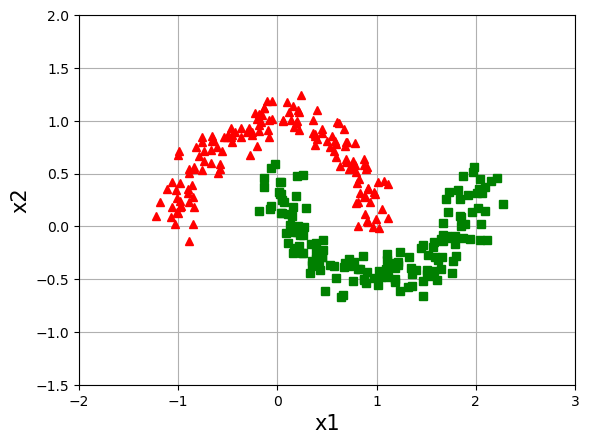

In [6]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
plt.axis([-2, 3, -1.5, 2])
plt.grid()
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM Models

## 1. Linear Kernel

In [8]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

In [9]:
C = 1
linear_svm = SVC(kernel="linear", C=C)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
linear_svm.fit(X_scaled, y_train)
print("Linear SVM:","Intercept:", linear_svm.intercept_,"Coefficients", linear_svm.coef_)


Linear SVM: Intercept: [-0.17359179] Coefficients [[ 0.71090613 -1.5690931 ]]


In [20]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.fit_transform(X_test)
y_pred_test = linear_svm.predict(X_test_scaled)
print("Accuracy for SVM with Linear Kernel",accuracy_score(y_test, y_pred_test)*100,'%')

Accuracy for SVM with Linear Kernel 92.22222222222223 %


#### Plotting predictions for Linear Kernel

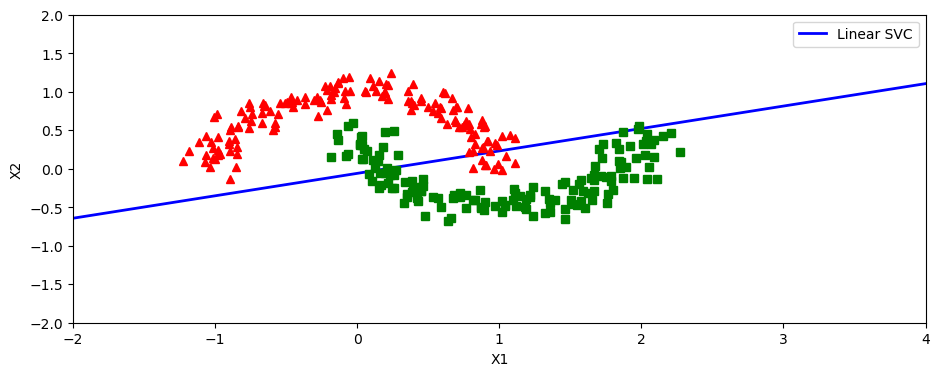

In [12]:
w1 = -linear_svm.coef_[0, 0]/linear_svm.coef_[0, 1]
b1 = -linear_svm.intercept_[0]/linear_svm.coef_[0, 1]
line = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
plt.figure(figsize=(11, 4))
plt.plot(line[:, 0], line[:, 1], "b-", linewidth=2, label="Linear SVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs") 
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^") 
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis([-2, 4, -2, 2])
plt.show()

#### Defining a plot function to plot all of our classifiers

In [13]:
def plot_predictions(clf, axes):
    x0 = np.linspace(axes[0], axes[1], 100)
    x1 = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0,x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

## 2. Polynomial Kernel

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm = SVC(kernel="poly", degree=3, coef0=1, C=5)
polynomial_svm.fit(X_scaled, y_train)

SVC(C=5, coef0=1, kernel='poly')

In [21]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.fit_transform(X_test)
y_pred_test = polynomial_svm.predict(X_test_scaled)
print("Accuracy score for SVM with Polynomial Kernel",accuracy_score(y_test, y_pred_test)*100,'%')

Accuracy score for SVM with Polynomial Kernel 95.55555555555556 %


#### Plotting predictions for Polynomial Kernel

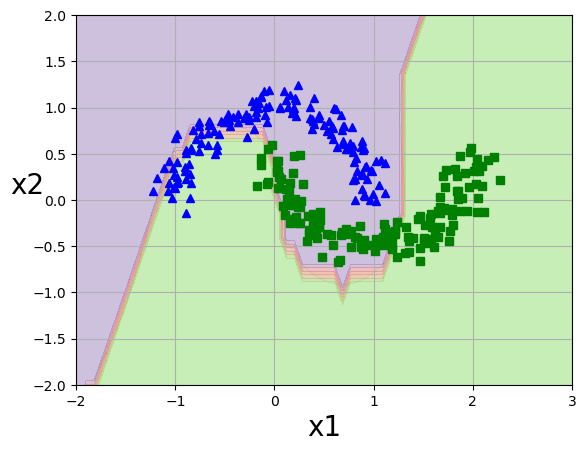

In [16]:
plot_predictions(polynomial_svm, [-4, 4, -10, 15]) # calling plot_predicitions function to plot output
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
plt.axis([-2, 3, -2, 2])
plt.grid()
plt.xlabel("x1", fontsize=20)
plt.ylabel("x2", fontsize=20, rotation=0)
plt.show()
plt.show()

## 3. RBF Kernel with different gamma and c values

In [17]:
# Intializing gamma values
gamma_1, gamma_2 = 1,100
# Intializing C values
c1, c2 = 1, 100
params = (gamma_1,c1), (gamma_1, c2), (gamma_2, c1), (gamma_2, c2)
# Intializing a list store svm classifiers with different parameters
classifiers = []

#### Fitting RBF kernel for different gamma and c values

In [18]:
from sklearn.svm import SVC
for gamma,c in params:
    rbf_svm = SVC(kernel="rbf", gamma=gamma, C=c)
    rbf_svm.fit(X_scaled, y_train)
    classifiers.append(rbf_svm)
    from sklearn.metrics import accuracy_score
    X_test_scaled = scaler.fit_transform(X_test)
    y_pred_test = rbf_svm.predict(X_test_scaled)
    print("Accuracy={} %, gamma={}, c={} ".format(accuracy_score(y_test, y_pred_test)*100,gamma,c))

Accuracy=100.0 %, gamma=1, c=1 
Accuracy=98.88888888888889 %, gamma=1, c=100 
Accuracy=80.0 %, gamma=100, c=1 
Accuracy=80.0 %, gamma=100, c=100 


#### Plotting predictions for RBF SVM with different gamma and c values

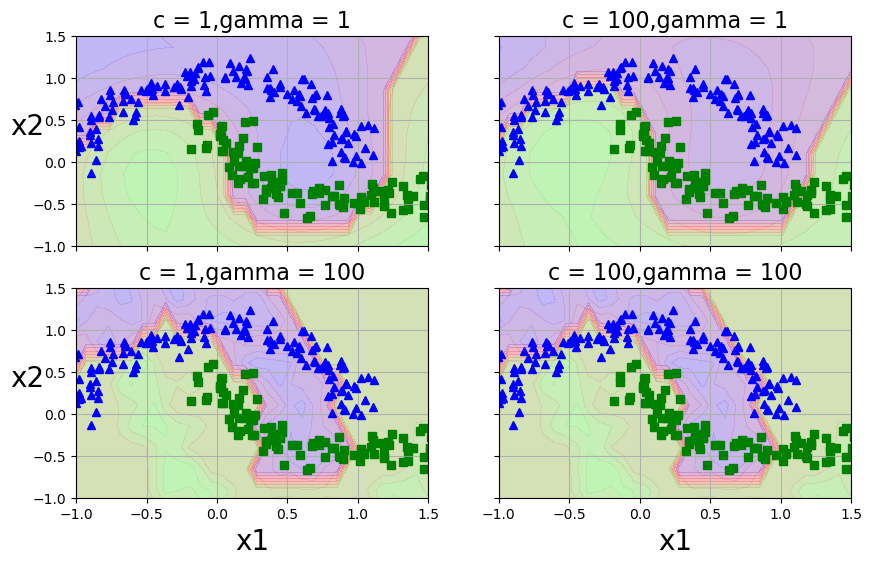

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), sharex=True, sharey=True)
for i, classifier in enumerate(classifiers):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(classifier, [-4, 4, -10, 15])
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
    plt.axis([-1,1.5, -1, 1.5])
    plt.grid()
    plt.xlabel("x1", fontsize=20)
    plt.ylabel("x2", fontsize=20, rotation=0)
    gamma, c= params[i]
    plt.title("c = {},gamma = {}".format(c, gamma), fontsize=16)
    # Adjusting space between plots
    if i in (0, 1):
        plt.xlabel(" ")
    if i in (1, 3):
        plt.ylabel(" ")
plt.show()